In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [3]:
df_train=pd.read_csv('train_8wry4cB.csv')
df_test=pd.read_csv('test_Yix80N0.csv')

In [4]:
# def time(df):
#     x=pd.to_datetime(df['startTime'])
#     y=pd.to_datetime(df['endTime'])
#     df['time_diff']=y-x
#     df['seconds_spent']=df['time_diff'].apply(lambda x:x.seconds)
#     df=df.drop(['time_diff'],axis=1)
#     df=df.drop(['startTime','endTime'],axis=1)
#     return df

In [5]:
df_train['data']='train'
df_test['data']='test'
df_train['gender']=df_train['gender'].map({'female':1,'male':0})

In [6]:
new=pd.concat([df_train,df_test])

C:\Users\vaiko\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
new

,ProductList,data,endTime,gender,session_id,startTime
0,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,train,15/12/14 18:12,1.0,u16159,15/12/14 18:11
1,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,train,16/12/14 14:41,0.0,u10253,16/12/14 14:35
2,A00002/B00001/C00020/D16944/,train,01/12/14 15:58,1.0,u19037,01/12/14 15:58
3,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,train,23/11/14 3:00,1.0,u14556,23/11/14 2:57
4,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,train,17/12/14 16:46,0.0,u24295,17/12/14 16:44
...,...,...,...,...,...,...
4495,A00001/B00031/C00044/D03435/;A00001/B00031/C00...,test,15/12/14 21:12,NaN,u23966,15/12/14 21:11
4496,A00002/B00002/C00004/D17474/;A00002/B00002/C00...,test,02/12/14 7:54,NaN,u20527,02/12/14 7:53
4497,A00002/B00007/C00098/D03350/;A00002/B00007/C00...,test,15/11/14 21:46,NaN,u13253,15/11/14 21:38
4498,A00001/B00031/C00044/D09604/,test,17/12/14 8:51,NaN,u17094,17/12/14 8:51


In [8]:
new['startTime']=pd.to_datetime(new['startTime'],format='%d/%m/%y %H:%M')
new['endTime']=pd.to_datetime(new['endTime'],format='%d/%m/%y %H:%M')

In [9]:
new['time_diff']=new['endTime']-new['startTime']

In [10]:
# new['days']=new['time_diff'].astype('timdelta64[m]')
# new['seconds_spent']=new['time_diff'].apply(lambda x:x.seconds)

In [11]:
new['days']=new['time_diff'].astype('timedelta64[m]')

In [12]:
new['days'].describe()

count    15000.000000
mean       130.356600
std       1880.782561
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      50752.000000
Name: days, dtype: float64

In [13]:
new[new['session_id']=='u16159']['time_diff'][0]

Timedelta('0 days 00:01:00')

In [14]:
new[new['time_diff']==new['time_diff'].max()]

,ProductList,data,endTime,gender,session_id,startTime,time_diff,days
2997,A00002/B00002/C00007/D02364/;A00002/B00002/C00...,test,2014-12-20 15:28:00,NaN,u13629,2014-11-15 09:36:00,35 days 05:52:00,50752.0


In [15]:
new['days'][0]

0    1.0
0    0.0
Name: days, dtype: float64

In [16]:
new['

SyntaxError: EOL while scanning string literal (<ipython-input-16-6c2809079dd9>, line 1)

In [17]:
new.head()

,ProductList,data,endTime,gender,session_id,startTime,time_diff,days
0,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,train,2014-12-15 18:12:00,1.0,u16159,2014-12-15 18:11:00,00:01:00,1.0
1,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,train,2014-12-16 14:41:00,0.0,u10253,2014-12-16 14:35:00,00:06:00,6.0
2,A00002/B00001/C00020/D16944/,train,2014-12-01 15:58:00,1.0,u19037,2014-12-01 15:58:00,00:00:00,0.0
3,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,train,2014-11-23 03:00:00,1.0,u14556,2014-11-23 02:57:00,00:03:00,3.0
4,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,train,2014-12-17 16:46:00,0.0,u24295,2014-12-17 16:44:00,00:02:00,2.0


In [18]:
new['ids']=new['ProductList'].apply(lambda x:x.split(';'))

In [19]:
new

,ProductList,data,endTime,gender,session_id,startTime,time_diff,days,ids
0,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,train,2014-12-15 18:12:00,1.0,u16159,2014-12-15 18:11:00,00:01:00,1.0,"[A00002/B00003/C00006/D28435/, A00002/B00003/C..."
1,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,train,2014-12-16 14:41:00,0.0,u10253,2014-12-16 14:35:00,00:06:00,6.0,"[A00001/B00009/C00031/D29404/, A00001/B00009/C..."
2,A00002/B00001/C00020/D16944/,train,2014-12-01 15:58:00,1.0,u19037,2014-12-01 15:58:00,00:00:00,0.0,[A00002/B00001/C00020/D16944/]
3,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,train,2014-11-23 03:00:00,1.0,u14556,2014-11-23 02:57:00,00:03:00,3.0,"[A00002/B00004/C00018/D10284/, A00002/B00004/C..."
4,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,train,2014-12-17 16:46:00,0.0,u24295,2014-12-17 16:44:00,00:02:00,2.0,"[A00001/B00001/C00012/D30805/, A00001/B00001/C..."
...,...,...,...,...,...,...,...,...,...
4495,A00001/B00031/C00044/D03435/;A00001/B00031/C00...,test,2014-12-15 21:12:00,NaN,u23966,2014-12-15 21:11:00,00:01:00,1.0,"[A00001/B00031/C00044/D03435/, A00001/B00031/C..."
4496,A00002/B00002/C00004/D17474/;A00002/B00002/C00...,test,2014-12-02 07:54:00,NaN,u20527,2014-12-02 07:53:00,00:01:00,1.0,"[A00002/B00002/C00004/D17474/, A00002/B00002/C..."
4497,A00002/B00007/C00098/D03350/;A00002/B00007/C00...,test,2014-11-15 21:46:00,NaN,u13253,2014-11-15 21:38:00,00:08:00,8.0,"[A00002/B00007/C00098/D03350/, A00002/B00007/C..."
4498,A00001/B00031/C00044/D09604/,test,2014-12-17 08:51:00,NaN,u17094,2014-12-17 08:51:00,00:00:00,0.0,[A00001/B00031/C00044/D09604/]


In [20]:
def din(data,x):
    l=[]
    for i in data:
        for j in i.split('/'):
            if(j.startswith(x) and j not in l):
                l.append(j)
    return l

In [21]:
new['A']=new['ids'].apply(lambda x:','.join(din(x,'A')))
new['B']=new['ids'].apply(lambda x:','.join(din(x,'B')))
new['C']=new['ids'].apply(lambda x:','.join(din(x,'C')))
new['D']=new['ids'].apply(lambda x:','.join(din(x,'D')))

# new['A1']=new['ids'].apply(lambda x:din(x,'A'))
# new['B1']=new['ids'].apply(lambda x:din(x,'B'))
# new['C1']=new['ids'].apply(lambda x:din(x,'C'))
# new['D1']=new['ids'].apply(lambda x:din(x,'D'))

In [22]:
new.head()

,ProductList,data,endTime,gender,session_id,startTime,time_diff,days,ids,A,B,C,D
0,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,train,2014-12-15 18:12:00,1.0,u16159,2014-12-15 18:11:00,00:01:00,1.0,"[A00002/B00003/C00006/D28435/, A00002/B00003/C...",A00002,B00003,C00006,"D28435,D02554,D28436,D28437"
1,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,train,2014-12-16 14:41:00,0.0,u10253,2014-12-16 14:35:00,00:06:00,6.0,"[A00001/B00009/C00031/D29404/, A00001/B00009/C...",A00001,B00009,C00031,"D29404,D02617,D29407,D29410,D29411,D25444,D29418"
2,A00002/B00001/C00020/D16944/,train,2014-12-01 15:58:00,1.0,u19037,2014-12-01 15:58:00,00:00:00,0.0,[A00002/B00001/C00020/D16944/],A00002,B00001,C00020,D16944
3,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,train,2014-11-23 03:00:00,1.0,u14556,2014-11-23 02:57:00,00:03:00,3.0,"[A00002/B00004/C00018/D10284/, A00002/B00004/C...",A00002,B00004,C00018,"D10284,D10285,D10286"
4,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,train,2014-12-17 16:46:00,0.0,u24295,2014-12-17 16:44:00,00:02:00,2.0,"[A00001/B00001/C00012/D30805/, A00001/B00001/C...",A00001,B00001,C00012,"D30805,D30806"


In [23]:
new[new['B']=='B00002']['A'].value_counts()

A00002    3155
Name: A, dtype: int64

In [24]:
new[new['A']=='A00002'].shape

(9345, 13)

In [25]:
new.shape

(15000, 13)

In [26]:
def fun1_A(data):
    l=[]
    for i in data:
        for j in i.split('/'):
            if(j.startswith('D')):
                l.append(j)
    return len(l)

In [27]:
new

,ProductList,data,endTime,gender,session_id,startTime,time_diff,days,ids,A,B,C,D
0,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,train,2014-12-15 18:12:00,1.0,u16159,2014-12-15 18:11:00,00:01:00,1.0,"[A00002/B00003/C00006/D28435/, A00002/B00003/C...",A00002,B00003,C00006,"D28435,D02554,D28436,D28437"
1,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,train,2014-12-16 14:41:00,0.0,u10253,2014-12-16 14:35:00,00:06:00,6.0,"[A00001/B00009/C00031/D29404/, A00001/B00009/C...",A00001,B00009,C00031,"D29404,D02617,D29407,D29410,D29411,D25444,D29418"
2,A00002/B00001/C00020/D16944/,train,2014-12-01 15:58:00,1.0,u19037,2014-12-01 15:58:00,00:00:00,0.0,[A00002/B00001/C00020/D16944/],A00002,B00001,C00020,D16944
3,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,train,2014-11-23 03:00:00,1.0,u14556,2014-11-23 02:57:00,00:03:00,3.0,"[A00002/B00004/C00018/D10284/, A00002/B00004/C...",A00002,B00004,C00018,"D10284,D10285,D10286"
4,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,train,2014-12-17 16:46:00,0.0,u24295,2014-12-17 16:44:00,00:02:00,2.0,"[A00001/B00001/C00012/D30805/, A00001/B00001/C...",A00001,B00001,C00012,"D30805,D30806"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,A00001/B00031/C00044/D03435/;A00001/B00031/C00...,test,2014-12-15 21:12:00,NaN,u23966,2014-12-15 21:11:00,00:01:00,1.0,"[A00001/B00031/C00044/D03435/, A00001/B00031/C...",A00001,B00031,C00044,"D03435,D01860,D01690"
4496,A00002/B00002/C00004/D17474/;A00002/B00002/C00...,test,2014-12-02 07:54:00,NaN,u20527,2014-12-02 07:53:00,00:01:00,1.0,"[A00002/B00002/C00004/D17474/, A00002/B00002/C...",A00002,B00002,"C00004,C00002","D17474,D17477"
4497,A00002/B00007/C00098/D03350/;A00002/B00007/C00...,test,2014-11-15 21:46:00,NaN,u13253,2014-11-15 21:38:00,00:08:00,8.0,"[A00002/B00007/C00098/D03350/, A00002/B00007/C...",A00002,B00007,"C00098,C00041","D03350,D03351,D03352,D03354,D03356,D03357,D019..."
4498,A00001/B00031/C00044/D09604/,test,2014-12-17 08:51:00,NaN,u17094,2014-12-17 08:51:00,00:00:00,0.0,[A00001/B00031/C00044/D09604/],A00001,B00031,C00044,D09604


In [28]:
# new['len_d']=new['D1'].apply(fun1_A,'D')
# new['len_A']=new['A1'].apply(fun1_A,'A')
# new['len_D']=new['D1'].apply(fun1_A)
# new['len_C']=new['C1'].apply(fun1_A,'C')

In [29]:
# new[['len_A','len_D','len_B','len_C']]

In [30]:
def uniqu1e(df):
    l=[]
    for i in df:
        for j in i:
            if(j not in l):
                l.append(j)
    return sorted(l)

In [31]:
l_list=[]
cols=['A']
for i in cols:
    for j in uniqu1e(new[i]):
        l_list.append(j)

In [32]:
new = pd.concat([new, new['A'].str.get_dummies(',')], axis=1)
new = pd.concat([new, new['B'].str.get_dummies(',')], axis=1)
new = pd.concat([new, new['C'].str.get_dummies(',')], axis=1)

In [33]:
new=new.drop(['A','B','C','D'],axis=1)

In [34]:
new=new.drop(['ProductList','ids'],axis=1)

In [35]:
new.head()

,data,endTime,gender,session_id,startTime,time_diff,days,A00001,A00002,A00003,...,C00424,C00427,C00429,C00430,C00431,C00432,C00435,C00436,C00438,C00439
0,train,2014-12-15 18:12:00,1.0,u16159,2014-12-15 18:11:00,00:01:00,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,train,2014-12-16 14:41:00,0.0,u10253,2014-12-16 14:35:00,00:06:00,6.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,train,2014-12-01 15:58:00,1.0,u19037,2014-12-01 15:58:00,00:00:00,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,train,2014-11-23 03:00:00,1.0,u14556,2014-11-23 02:57:00,00:03:00,3.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,train,2014-12-17 16:46:00,0.0,u24295,2014-12-17 16:44:00,00:02:00,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# new=new.drop(['endTime','startTime','time_diff'],axis=1)

In [37]:
new

,data,endTime,gender,session_id,startTime,time_diff,days,A00001,A00002,A00003,...,C00424,C00427,C00429,C00430,C00431,C00432,C00435,C00436,C00438,C00439
0,train,2014-12-15 18:12:00,1.0,u16159,2014-12-15 18:11:00,00:01:00,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,train,2014-12-16 14:41:00,0.0,u10253,2014-12-16 14:35:00,00:06:00,6.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,train,2014-12-01 15:58:00,1.0,u19037,2014-12-01 15:58:00,00:00:00,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,train,2014-11-23 03:00:00,1.0,u14556,2014-11-23 02:57:00,00:03:00,3.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,train,2014-12-17 16:46:00,0.0,u24295,2014-12-17 16:44:00,00:02:00,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,test,2014-12-15 21:12:00,NaN,u23966,2014-12-15 21:11:00,00:01:00,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4496,test,2014-12-02 07:54:00,NaN,u20527,2014-12-02 07:53:00,00:01:00,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4497,test,2014-11-15 21:46:00,NaN,u13253,2014-11-15 21:38:00,00:08:00,8.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4498,test,2014-12-17 08:51:00,NaN,u17094,2014-12-17 08:51:00,00:00:00,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# new1=new.drop(['session_id'],axis=1)
# new1=new1[new1['data']=='train']
# new1=new1.drop(['data'],axis=1)

# new1

# from sklearn.cluster import KMeans

# wcss = []

# for k in range(1,10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(new1)
#     wcss.append(kmeans.inertia_)
    
# # Visualization of k values:

# plt.plot(range(1,10), wcss, color='red')
# plt.title('Graph of k values and WCSS')
# plt.xlabel('k values')
# plt.ylabel('wcss values')
# plt.show()

# from scipy.cluster.hierarchy import linkage, dendrogram
# plt.figure(figsize=[10,10])
# merg = linkage(new1, method='ward')
# dendrogram(merg, leaf_rotation=90)
# plt.title('Dendrogram')
# plt.xlabel('Data Points')
# plt.ylabel('Euclidean Distances')
# plt.show()

# km=KMeans(n_clusters=2)
# cluster=km.fit_predict(new1)
# new1['kmean']=cluster

# from sklearn.model_selection import train_test_split
# X=new1.drop(['gender'],axis=1)
# y=new1['gender']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# from xgboost import XGBClassifier

# xgb=XGBClassifier()

# xgb.fit(X_train,y_train)

# pred=xgb.predict(X_test)

# from sklearn.metrics import accuracy_score

# accuracy_score(y_test,pred)

# new1[new1['gender']==0.0]['seconds_spent'].describe()

# new1[new1['gender']==1.0]['seconds_spent'].describe()

In [39]:
x=0
def fun1(data):
    x=np.sum(data[l1])
    return x
        

In [40]:
cols=['data','session_id','gender','days','seconds_spent']
l1=[i for i in new.columns if(i not in cols)]
l1

['endTime',
 'startTime',
 'time_diff',
 'A00001',
 'A00002',
 'A00003',
 'A00004',
 'A00005',
 'A00006',
 'A00007',
 'A00008',
 'A00009',
 'A00010',
 'A00011',
 'B00001',
 'B00002',
 'B00003',
 'B00004',
 'B00005',
 'B00006',
 'B00007',
 'B00008',
 'B00009',
 'B00010',
 'B00011',
 'B00012',
 'B00013',
 'B00014',
 'B00015',
 'B00016',
 'B00017',
 'B00018',
 'B00019',
 'B00020',
 'B00021',
 'B00022',
 'B00023',
 'B00024',
 'B00025',
 'B00026',
 'B00027',
 'B00028',
 'B00029',
 'B00030',
 'B00031',
 'B00032',
 'B00033',
 'B00034',
 'B00035',
 'B00036',
 'B00037',
 'B00038',
 'B00039',
 'B00040',
 'B00041',
 'B00042',
 'B00043',
 'B00044',
 'B00045',
 'B00046',
 'B00047',
 'B00048',
 'B00049',
 'B00050',
 'B00051',
 'B00052',
 'B00053',
 'B00054',
 'B00055',
 'B00056',
 'B00057',
 'B00058',
 'B00059',
 'B00060',
 'B00061',
 'B00062',
 'B00063',
 'B00064',
 'B00065',
 'B00066',
 'B00067',
 'B00069',
 'B00070',
 'B00071',
 'B00072',
 'B00073',
 'B00074',
 'B00075',
 'B00076',
 'B00077',
 'B

In [41]:
new1=new.drop(['endTime','session_id','startTime','time_diff','endTime'],axis=1)
new1=new1[new1.data=='train']
new1=new1.drop(['data','gender'],axis=1)

In [42]:
new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10500 entries, 0 to 10499
Columns: 481 entries, days to C00439
dtypes: float64(1), int64(480)
memory usage: 38.6 MB


In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=3)

In [44]:
y=new[new['data']=='train']

In [45]:
y=y['gender'].astype(int)

In [46]:
d3=dtc.fit(new1,y)

C:\Users\vaiko\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


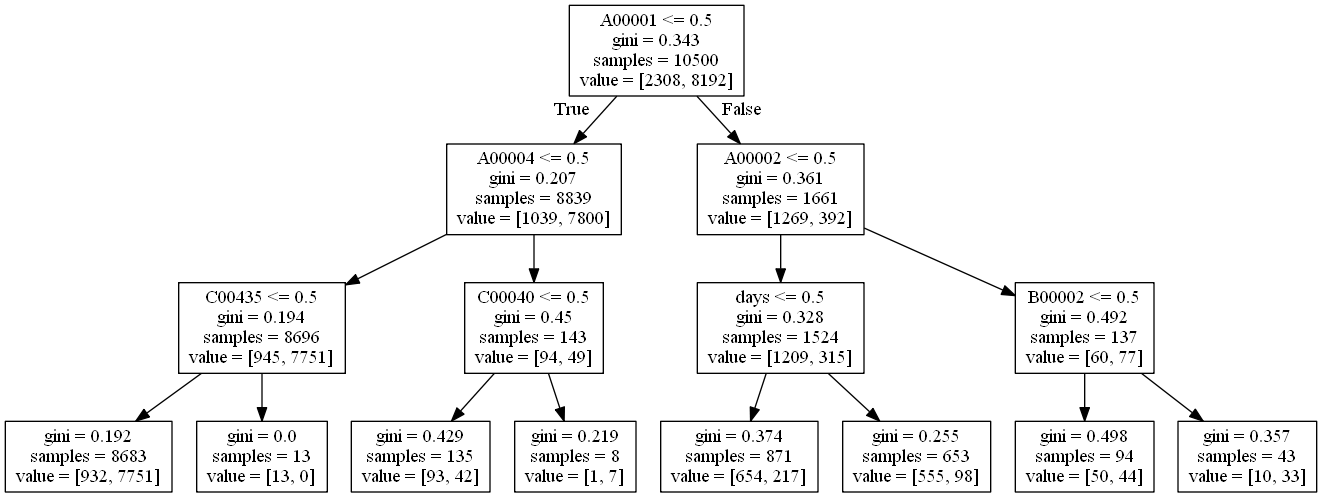

In [47]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot_ng as pydot

features = new1.columns
# Create DOT data
dot_data = export_graphviz(d3, out_file=None, feature_names=features)

# Draw graph
graph = pydot.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

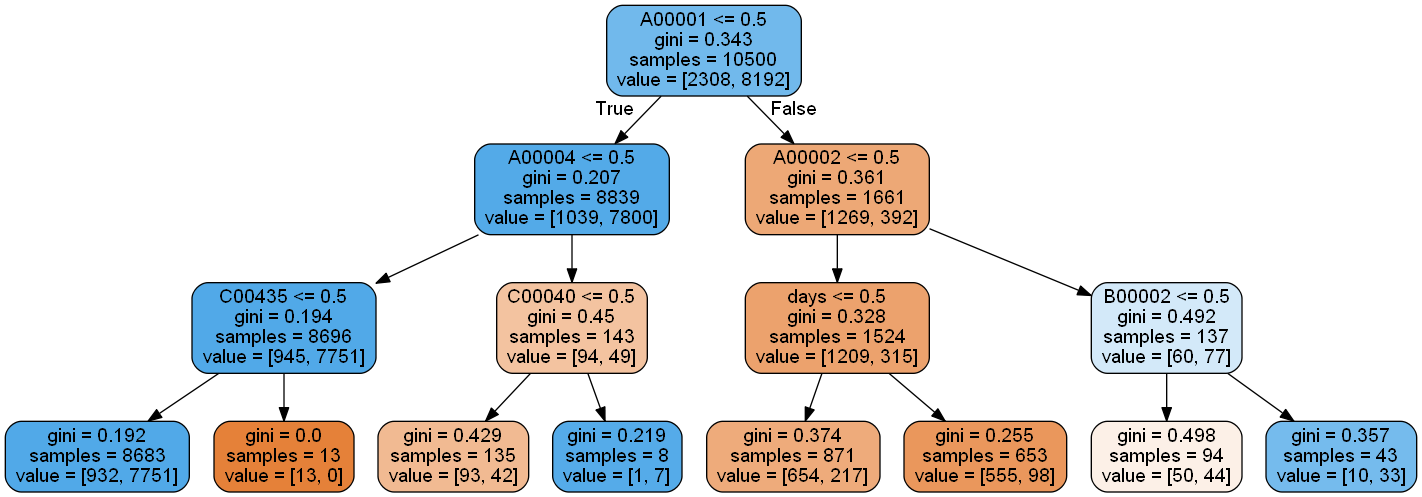

In [49]:
dtc=DecisionTreeClassifier(max_depth=3)
dtree=dtc.fit(new1,y)
features = list(new1.columns)

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [68]:
pip install pydot_ng

Note: you may need to restart the kernel to use updated packages.


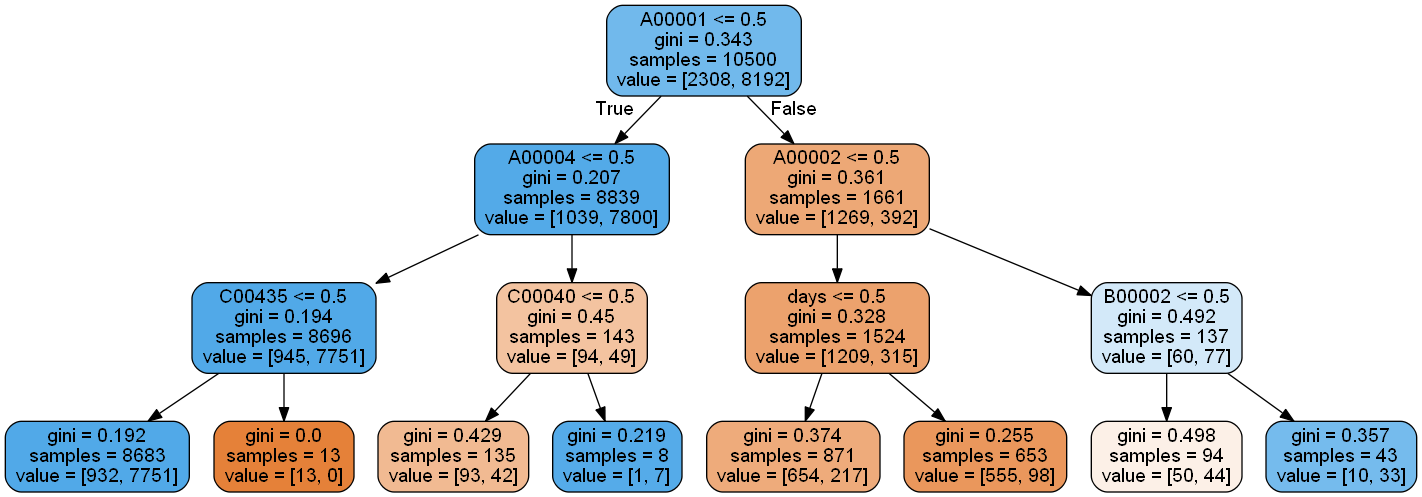

In [51]:
dtc=DecisionTreeClassifier(max_depth=3)
dtree=dtc.fit(new1,y)
features = list(new1.columns)

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  